# Implementado DBSCAN

## Importar librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

## Preparando datos de prueba

In [2]:
X, y, c = make_blobs(n_samples=500, cluster_std=0.8, centers=4, n_features=2, return_centers=True, random_state=42)

df_blobs = pd.DataFrame(
    {
        'x1':X[:,0],
        'x2':X[:,1]
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1]
    }
)

In [3]:
# Lunas
X_m, y_m = make_moons(n_samples=250, noise=0.05, random_state=42)

df_moons = pd.DataFrame({
    "x1": X_m[:,0],
    "x2": X_m[:,1]
})

## Visualizando los datos

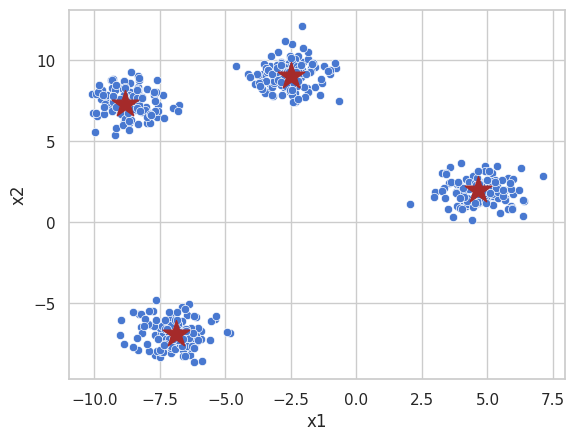

In [4]:
sns.set_theme(context='notebook', style='whitegrid', palette='muted')
sns.scatterplot(data=df_blobs, x='x1',y='x2')
plt.scatter(data=df_centers, x='x1',y='x2', marker='*', s=400, color='brown')
plt.show()

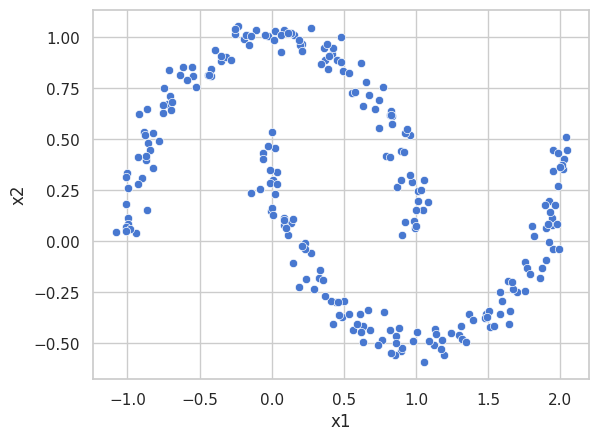

In [5]:
# Visualizando las lunas
sns.scatterplot(data=df_moons, x='x1',y='x2')
plt.show()

## Implementando DBSCAN

In [6]:
dbscan_cluster = DBSCAN(eps=0.3, min_samples=3)
y_m_predict =  dbscan_cluster.fit_predict(X_m)
df_moons['cluster'] = y_m_predict
df_moons

,x1,x2,cluster
0,0.084154,0.113341,0
1,1.050915,0.154710,1
2,-0.716555,0.675608,1
3,0.060932,0.926542,1
4,-1.005525,0.336425,1
...,...,...,...
245,-0.929175,0.415625,1
246,0.958694,0.327841,1
247,-0.750714,0.669825,1
248,0.825590,-0.547466,0


## Visualizando los cluster de Luna

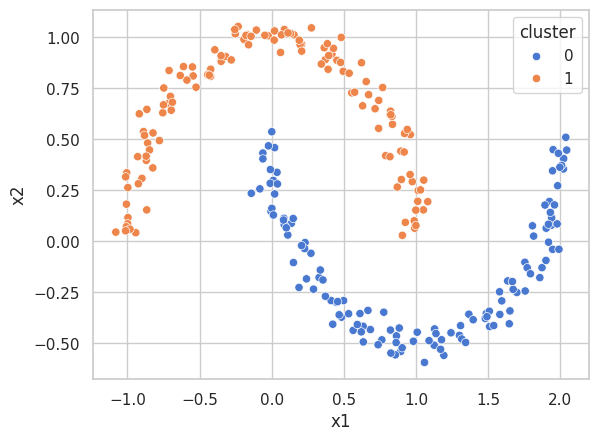

In [7]:
sns.scatterplot(data=df_moons, x='x1', y='x2', hue='cluster')
plt.show()

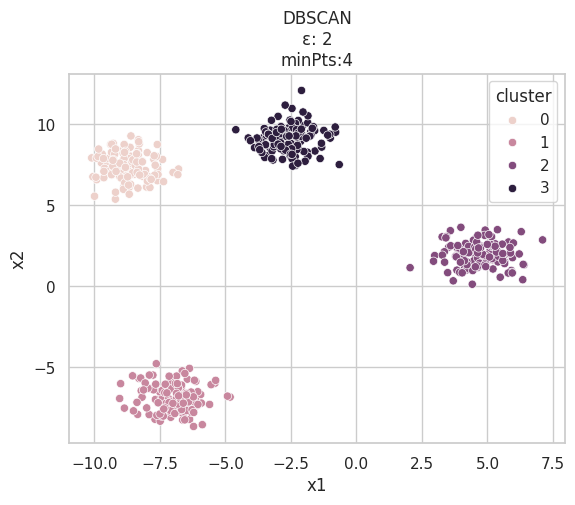

In [8]:
dbscan = DBSCAN(eps=2, min_samples=4)
y_predict = dbscan.fit_predict(X)
df_blobs['cluster'] = y_predict

sns.scatterplot(data=df_blobs, x='x1',y='x2',hue='cluster');
plt.title('''DBSCAN
ε: 2
minPts:4''');
plt.show()

La configuración precisa de los hiperparámetros en DBSCAN es fundamental para obtener resultados de agrupación precisos y significativos. Un valor incorrecto de epsilon o minPts puede llevar a resultados incoherentes. Ajustar los hiperparámetros de acuerdo con los datos y evaluar los resultados es esencial.

# Encontrar híper-parámetros

In [9]:
from sklearn.neighbors import NearestNeighbors

In [10]:
neighbors =  NearestNeighbors(n_neighbors=3)

neighbors_fit = neighbors.fit(X)

distances, index = neighbors_fit.kneighbors(X)

In [11]:
distances



array([[0.        , 0.10187705, 0.17524267],
       [0.        , 0.62080689, 0.7023487 ],
       [0.        , 0.04394921, 0.59277933],
       ...,
       [0.        , 0.14700045, 0.28342456],
       [0.        , 0.15663647, 0.23884087],
       [0.        , 0.1655336 , 0.17295469]])

In [12]:
index

array([[  0, 335, 451],
       [  1, 358, 394],
       [  2, 305, 102],
       ...,
       [497,  26, 167],
       [498, 190, 122],
       [499, 187, 461]])

In [13]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

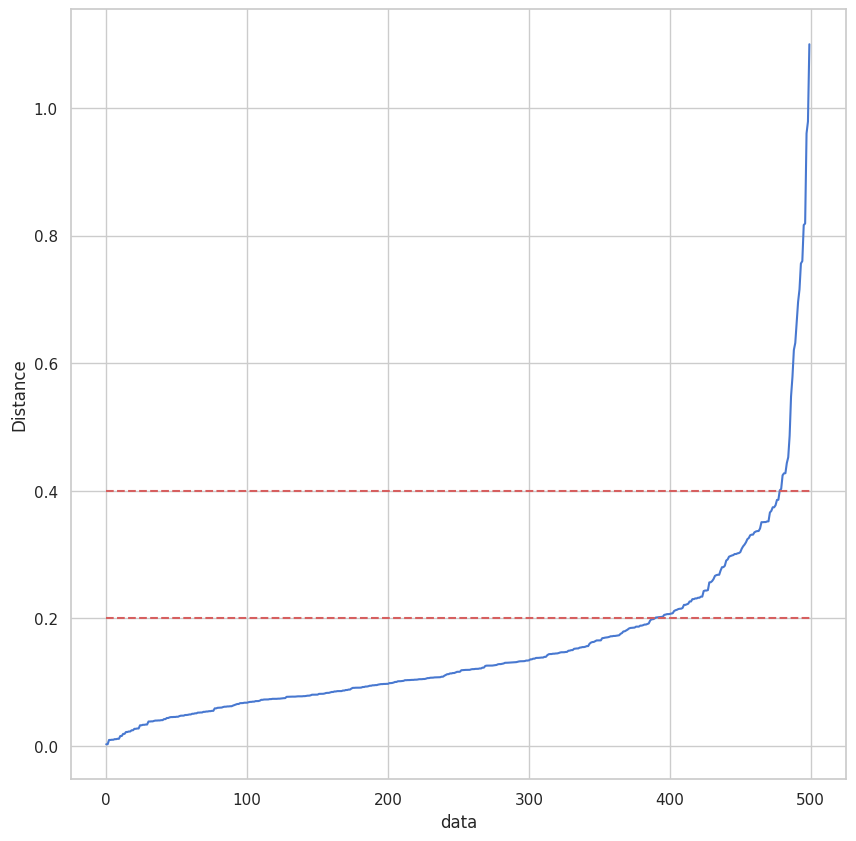

In [14]:
fig = plt.figure(figsize=(10, 10))

plt.plot(distances)
plt.xlabel('data')
plt.ylabel('Distance')

plt.hlines(y=0.4, xmin=0, xmax=500, linestyles='dashed', colors="r")
plt.hlines(y=0.2, xmin=0, xmax=500, linestyles='dashed', colors="r")

plt.show()

In [15]:
eps_values = np.arange(0.25, 0.80, 0.1)
min_samples = np.arange(2,10)

In [16]:
from itertools import product

In [17]:
dbscan_params = list(product(eps_values, min_samples))

sil_score = []

for p in dbscan_params:
    y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(X)
    sil_score.append(silhouette_score(X, y_pred))

In [18]:
df_params_tunning =  pd.DataFrame.from_records(dbscan_params, columns=['Eps', 'Min_Samples'])

In [19]:
df_params_tunning
df_params_tunning['sil_scores'] = sil_score

In [20]:
pivot_data = pd.pivot_table(df_params_tunning, values='sil_scores', index='Min_Samples', columns="Eps")

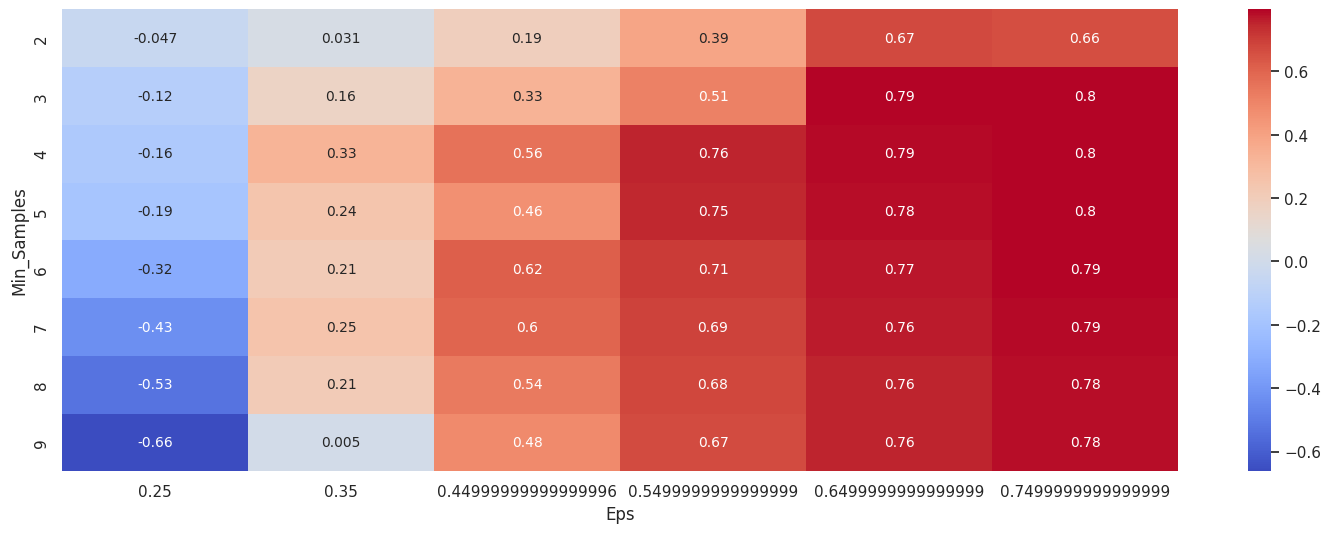

In [21]:
fig, ax =  plt.subplots(figsize=(18, 6))
sns.heatmap(data=pivot_data, annot=True, annot_kws={'size': 10}, cmap='coolwarm', ax= ax)
plt.show()


## Evaluando resultados de DBSCAN


In [22]:
dbscan_cluster = DBSCAN(eps=0.75, min_samples=4)
y_predict = dbscan_cluster.fit_predict(X)

df_blobs['cluster'] = y_predict

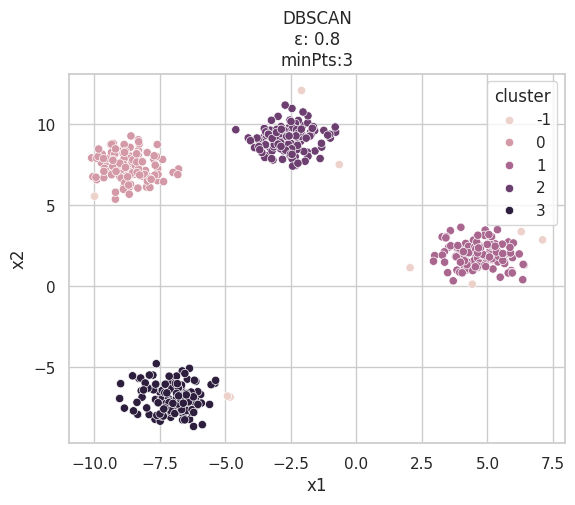

In [23]:
sns.scatterplot(data=df_blobs, x='x1',y='x2',hue='cluster');
plt.title('''DBSCAN
ε: 0.8
minPts:3''');
plt.show()

For n_clusters = 5 The average silhouette_score is : 0.796208743013939


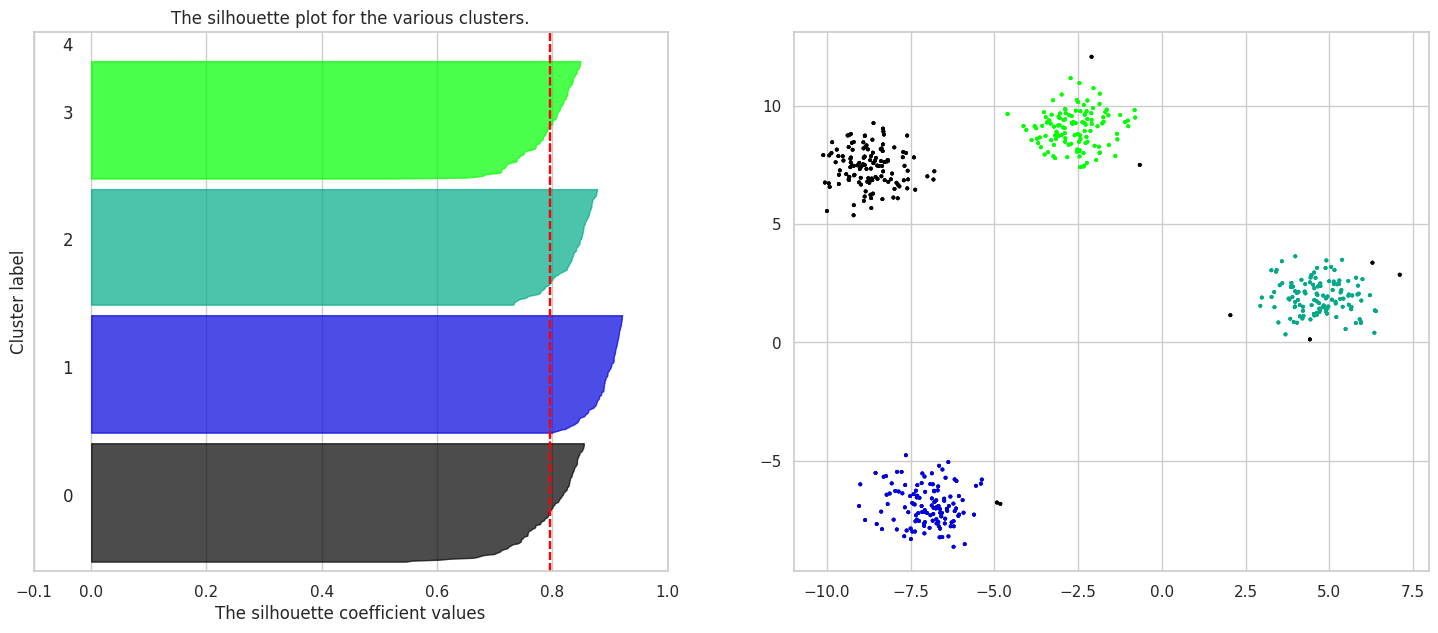

In [24]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score


    # Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

clusterer = DBSCAN(eps=0.74, min_samples=3)
cluster_labels = clusterer.fit_predict(X)
n_clusters = len(np.unique(cluster_labels))

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
plt.show()